<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Case: Yulu - Hypothesis Testing


##About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson,expon, geom, binom, ttest_1samp, ttest_ind, ttest_rel, chi2,chi2_contingency, chi2, chisquare, f_oneway, levene, shapiro, kruskal
import math
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#A) Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

In [2]:
!gdown 1JlLaJLkqAcfUFJvI1OACmuorXxL4gRzm

Downloading...
From: https://drive.google.com/uc?id=1JlLaJLkqAcfUFJvI1OACmuorXxL4gRzm
To: /content/bike_sharing.CSV
100% 648k/648k [00:00<00:00, 92.6MB/s]


In [3]:
df=pd.read_csv("/content/bike_sharing.CSV")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

 rows: 10886,
 columns: 12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datatype of following attributes needs to change to proper data type
* datetime - to datetime
* season - to categorical
* holiday - to categorical
* workingday - to categorical
* weather - to categorical

In [6]:
cat_cols=['season', 'holiday', 'workingday', 'weather']
num_cols=['temp' ,'atemp' ,'humidity','windspeed' ,'casual' ,'registered', 'count']

for i in cat_cols:
  df[i]=df[i].astype('object')

df['datetime']=pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


Any Missing value?

In [8]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Staticstical values

In [9]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Observation:

* There are no missing values in the dataset.
* Casual and Registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.


In [10]:
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

Try establishing a relation between the
dependent and independent variable
(Dependent “Count” & Independent:
Workingday, Weather, Season etc)


##Univariate Analysis:


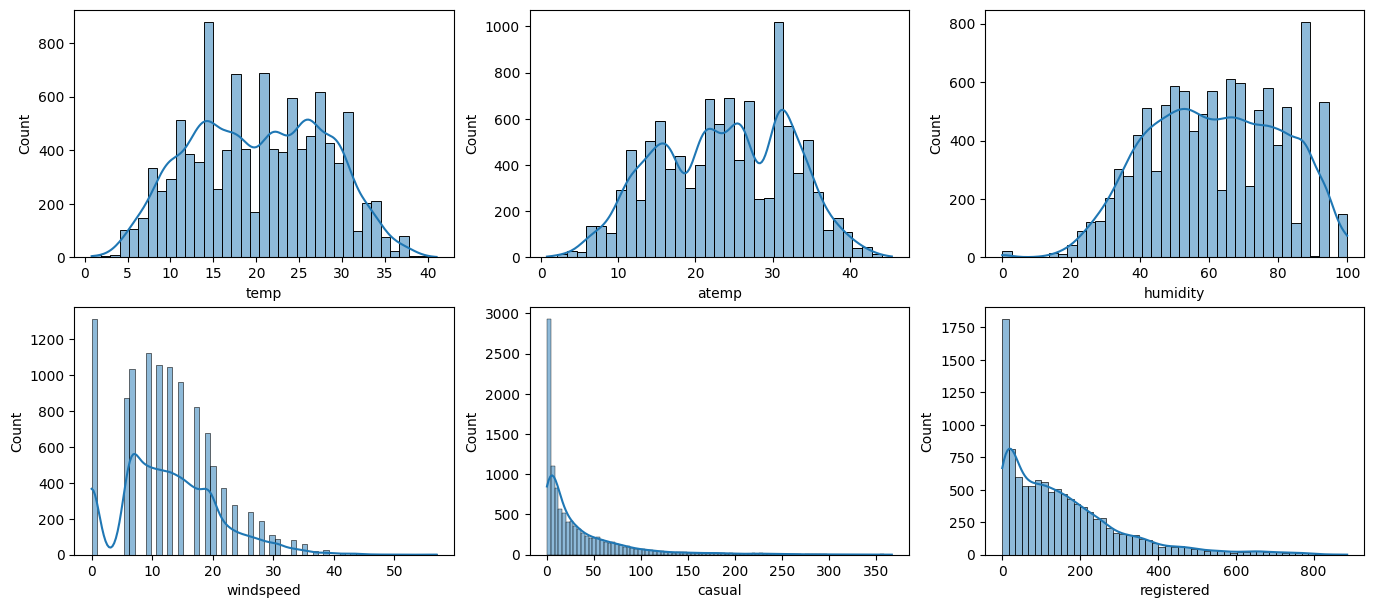

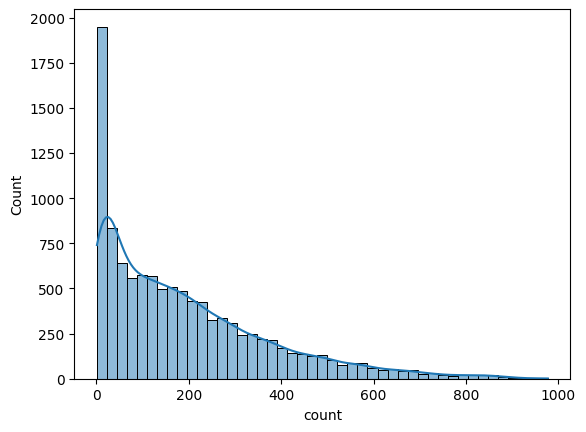

In [11]:
# understanding the distribution for numerical variables
fig, axs = plt.subplots(ncols=3,  nrows= 2, figsize=(12,5))
plt.subplots_adjust(top=1.2, right=1.2)
index=0

for row in range(2):
  for col in range(3):
    sns.histplot(x=df[num_cols[index]], kde=True, ax=axs[row,col])
    index+=1

plt.show()
sns.histplot(x=df[num_cols[-1]], kde=True)
plt.show()

Observation:

* casual, registered and count somewhat looks like Log Normal
Distribution
* temp, atemp and humidity looks like they follows the Normal Distribution
* windspeed follows the binomial distribution

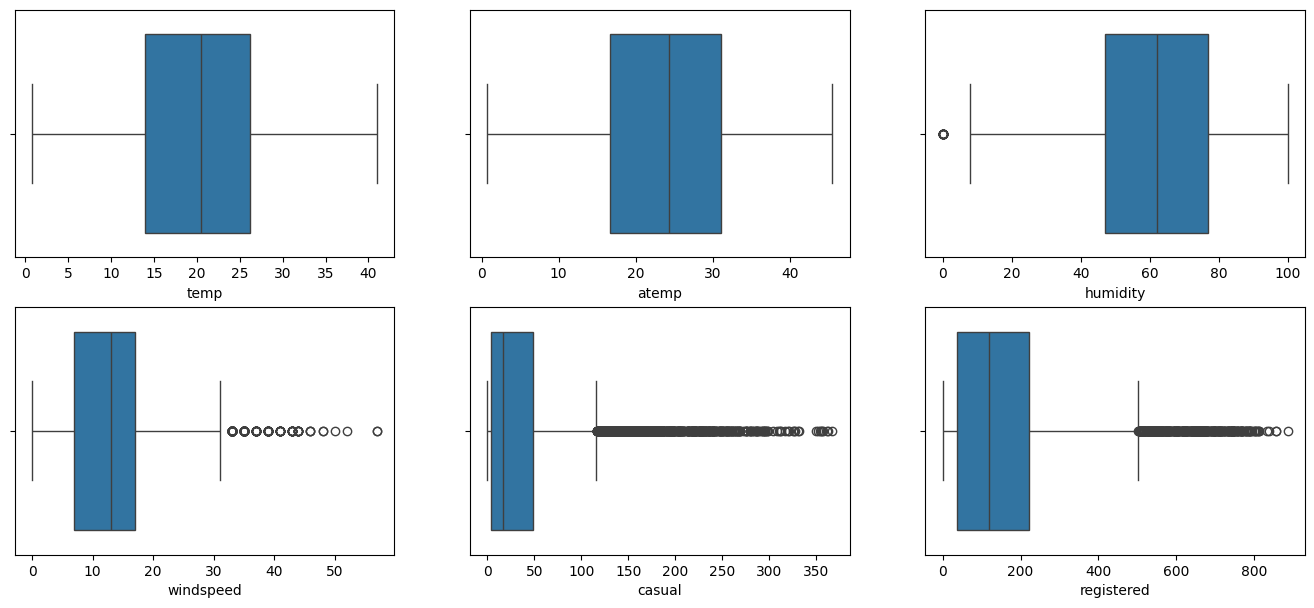

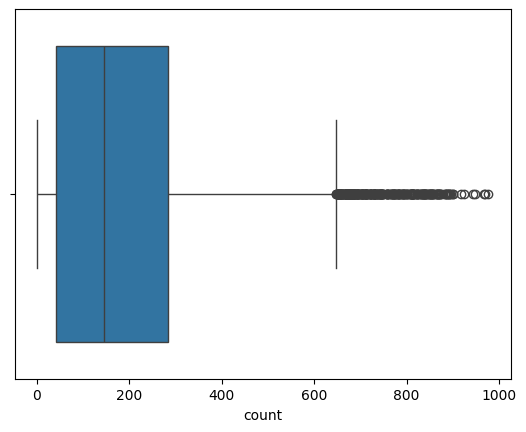

In [12]:
# plotting box plots to detect outliers in the data
fig, axs = plt.subplots(ncols=3,  nrows= 2, figsize=(12,5))
plt.subplots_adjust(top=1.2, right=1.2)
index=0

for row in range(2):
  for col in range(3):
    sns.boxplot(x=df[num_cols[index]], ax=axs[row,col])
    index+=1

plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

Observation:
* Looks like humidity, casual, registered and count have high outliers in the data.


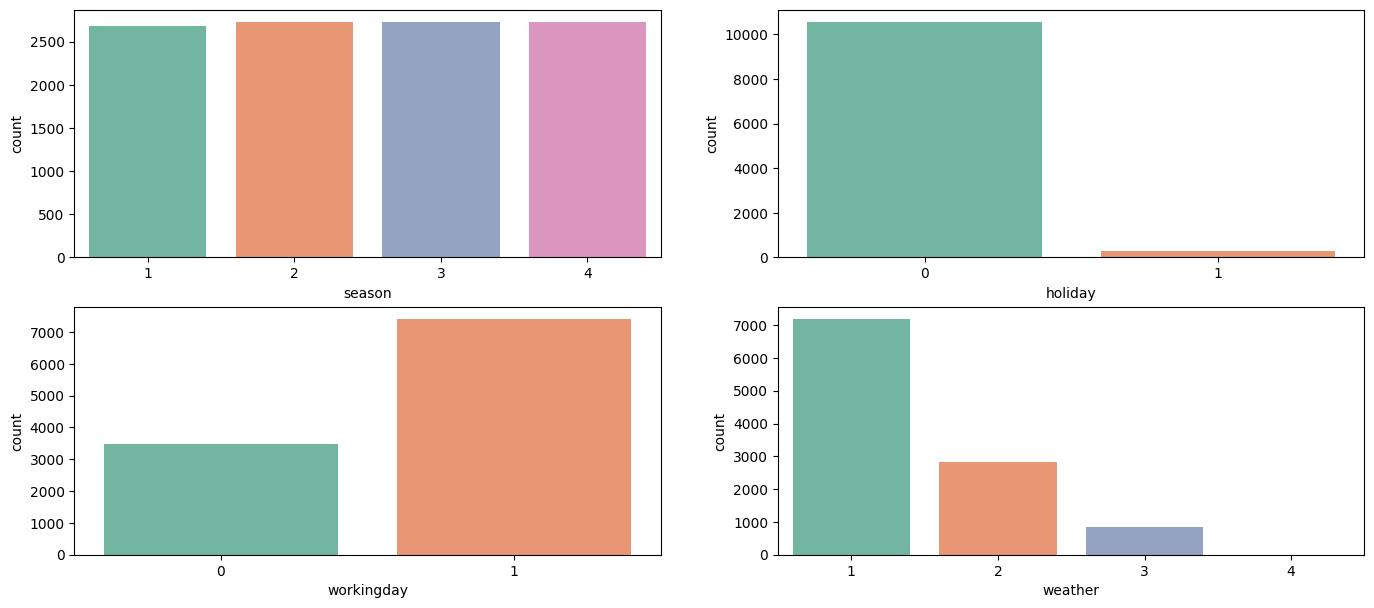

In [13]:
# countplot of each categorical column
fig, axs = plt.subplots(ncols=2,  nrows= 2, figsize=(12,5))
plt.subplots_adjust(top=1.2, right=1.2)
index=0

for row in range(2):
  for col in range(2):
    sns.countplot(x=df[cat_cols[index]], ax=axs[row,col] , palette='Set2')
    index+=1

plt.show()

Data looks common as it should be like equal number of days in each season, more working
days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.


#Bi-variate Analysis

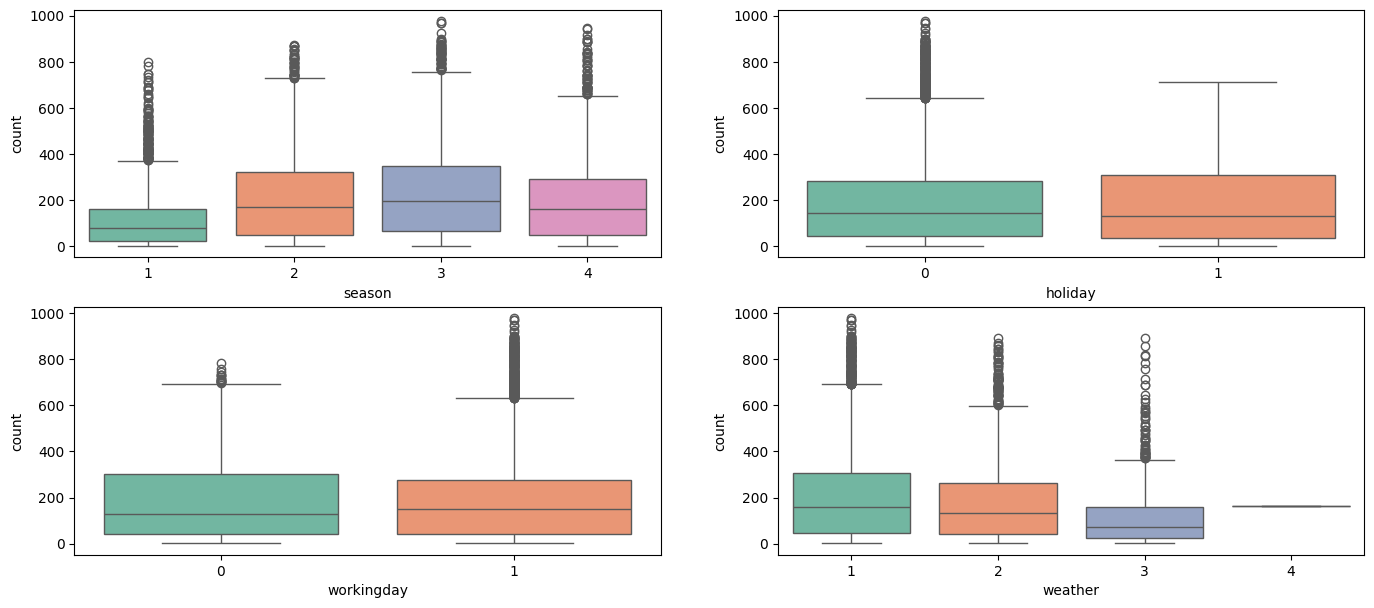

In [14]:
# plotting categorical variables againt count using boxplots
fig, axs = plt.subplots(ncols=2,  nrows= 2, figsize=(12,5))
plt.subplots_adjust(top=1.2, right=1.2)
index=0

for row in range(2):
  for col in range(2):
    sns.boxplot(x=cat_cols[index], y='count' , data=df, ax=axs[row,col] , palette='Set2')
    index+=1

plt.show()

* Probability of renting bikes in summer and fall seasons is more as compared to other seasons.
* Probability of renting bikes in spring is less as compared to other seasons.
* Probability of renting bikes when it's  a holiday is more.
* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less probability thet bikes is rented.


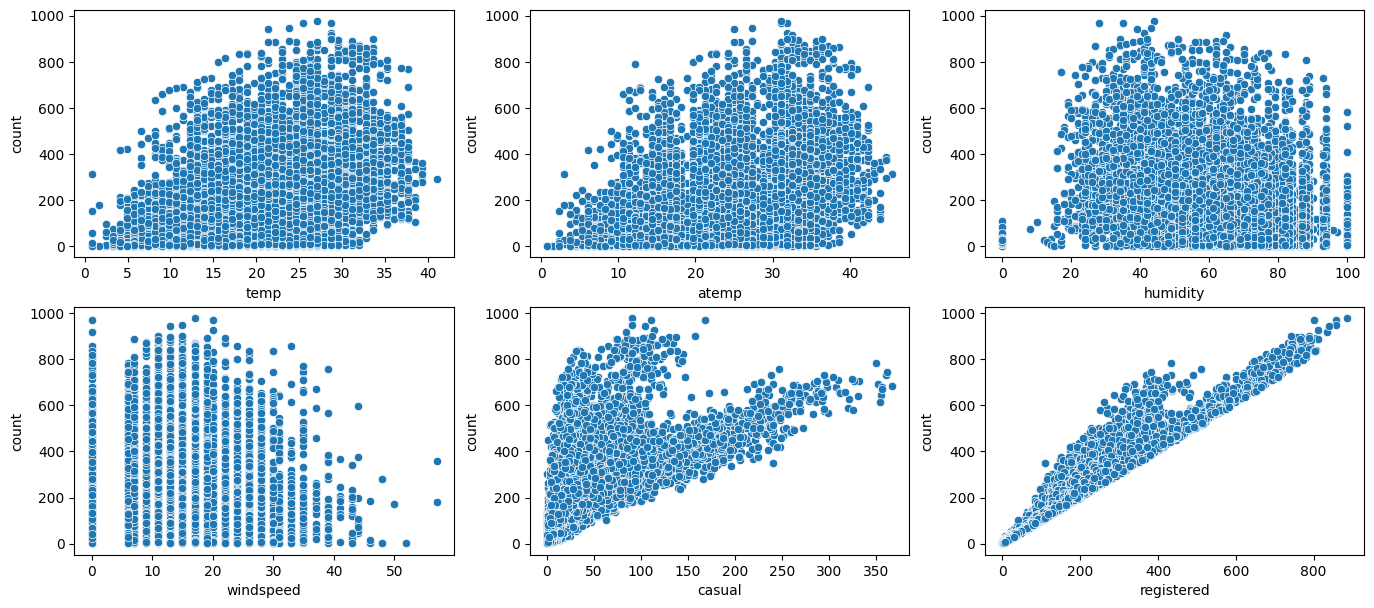

In [15]:
# plotting numerical variables againt count using scatterplot
fig, axs = plt.subplots(ncols=3,  nrows= 2, figsize=(12,5))
plt.subplots_adjust(top=1.2, right=1.2)
index=0

for row in range(2):
  for col in range(3):
    sns.scatterplot(x=num_cols[index], y='count' ,data=df, ax=axs[row,col])
    index+=1

plt.show()

* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

In [47]:
df.corr()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


In [16]:
# understanding the correlation between count and numerical variables
df.corr()['count']

datetime      0.310187
season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

Observation:
* Registered user and casual users are positively correlated.
* humidity, weather and holiday are negativelt correlated.

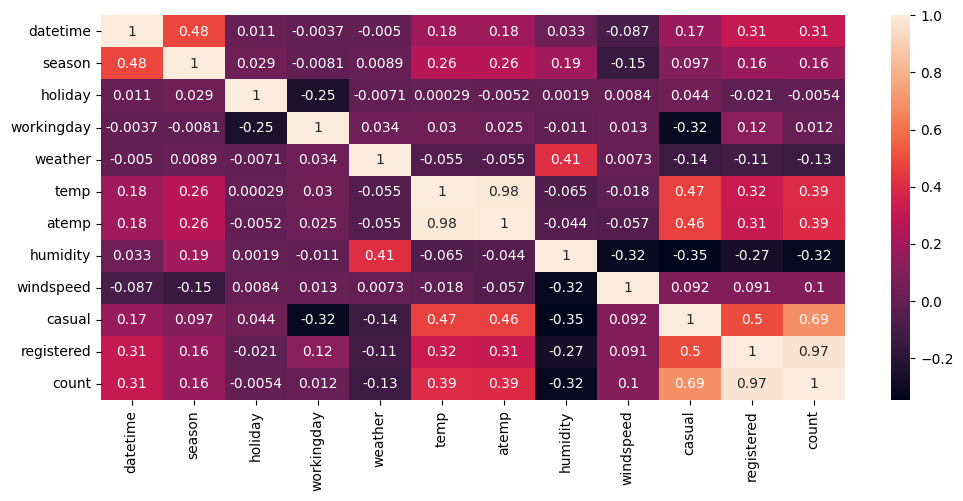

In [17]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

#2: Hypothesis Testing:
* **Chi-square test to check if Weather is dependent on the season**

* Null Hypothesis (H0): Weather is independent of the season
* Alternate Hypothesis (H1): Weather is not independent of the season
* Significance level (alpha): 0.05

In [18]:
data_table = pd.crosstab(df['weather'], df['season'])
data_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [19]:
res=chi2_contingency(data_table)
print('p-value is ', res[1])
if res[1]<0.05:
  print('Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. ie Weather is dependent on the season.')
else:
  print('Since p-value is greater than the alpha 0.05, We fail to reject the Null Hypothesis. ie Weather is independent of the season.')

p-value is  1.5499250736864862e-07
Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. ie Weather is dependent on the season.


* **2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented :**

* Null Hypothesis: Working day has no effect on the number of cycles being rented.
* Alternate Hypothesis: Working day has effect on the number of cycles being
rented.
* Significance level (alpha): 0.05


In [20]:
data_group1=df[df['workingday']==0]['count'].values
data_group2=df[df['workingday']==1]['count'].values

print('Variance of two groups are: ', np.var(data_group1), np.var(data_group2))
print('Ratio of variance is ', np.var(data_group2)//np.var(data_group1))

Variance of two groups are:  30171.346098942427 34040.69710674686
Ratio of variance is  1.0


Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

In [21]:
stats, pvalue = ttest_ind(data_group1, data_group2, equal_var=True)
print('pvalue is ', pvalue)

if pvalue<0.05:
  print('Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. ie We have the sufficient evidence to say that working day has effect on the number of cycles being rented.')
else:
  print('Since p-value is greater than the alpha 0.05, We fail to reject the Null Hypothesis. ie We don\'t have the sufficient evidence to say that working day has effect on the number of cycles being rented.')

pvalue is  0.22644804226361348
Since p-value is greater than the alpha 0.05, We fail to reject the Null Hypothesis. ie We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.


**ANNOVA Test to check if No. of cycles rented is similar or different with respect to**
 1. **weather**
 2. **Season**

* Null Hypothesis: Number of cycles rented is similar in different weather and
season.
* Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.
* Significance level (alpha): 0.05


Let's check all the assumption before checking anova test

In [22]:
grp1=df[(df['weather']==1) & (df['season']==1)]['count']
grp2=df[(df['weather']==1) & (df['season']==2)]['count']
grp3=df[(df['weather']==1) & (df['season']==3)]['count']
grp4=df[(df['weather']==1) & (df['season']==4)]['count']
grp5=df[(df['weather']==2) & (df['season']==1)]['count']
grp6=df[(df['weather']==2) & (df['season']==2)]['count']
grp7=df[(df['weather']==2) & (df['season']==3)]['count']
grp8=df[(df['weather']==2) & (df['season']==4)]['count']
grp9=df[(df['weather']==3) & (df['season']==1)]['count']
grp10=df[(df['weather']==3) & (df['season']==2)]['count']
grp11=df[(df['weather']==3) & (df['season']==3)]['count']
grp12=df[(df['weather']==3) & (df['season']==4)]['count']
grp13=df[(df['weather']==4) & (df['season']==1)]['count']
grp14=df[(df['weather']==4) & (df['season']==2)]['count']
grp15=df[(df['weather']==4) & (df['season']==3)]['count']
grp16=df[(df['weather']==4) & (df['season']==4)]['count']

groups=[grp1,grp2,grp3, grp4,grp5,grp6,grp7,grp8,grp9,grp10,grp11,grp12,grp13,grp14,grp15,grp16]

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


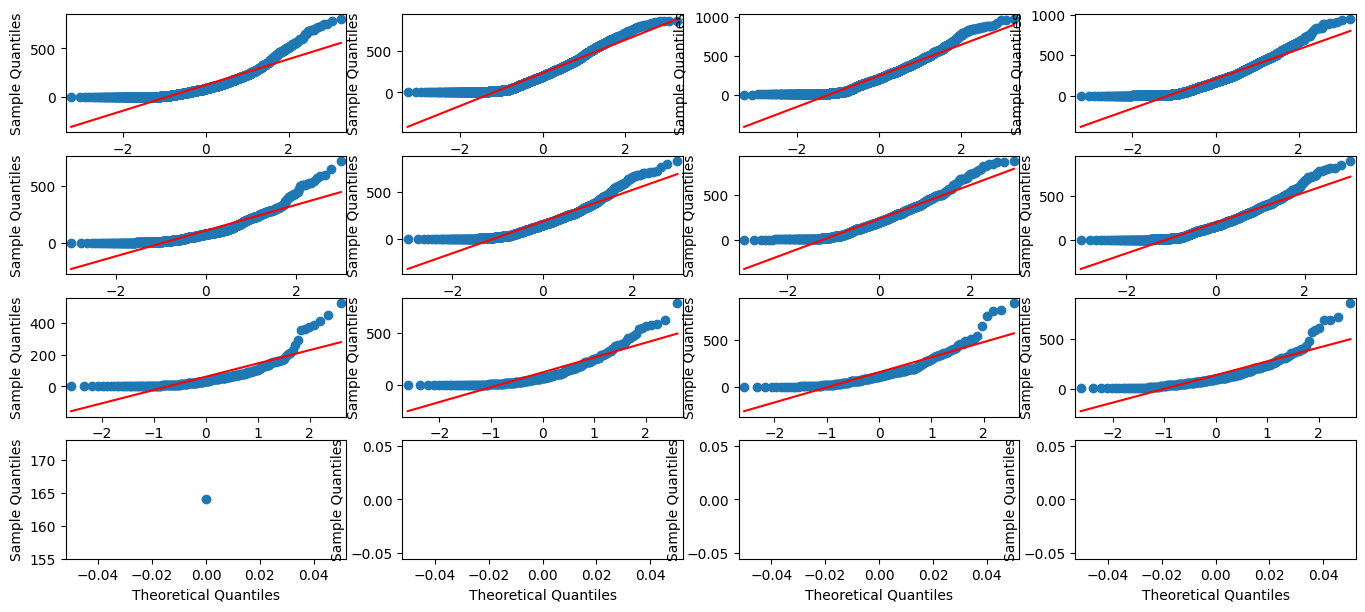

In [23]:
fig, axs = plt.subplots(ncols=4,  nrows= 4, figsize=(12,5))
plt.subplots_adjust(top=1.2, right=1.2)
index=0

for row in range(4):
  for col in range(4):
    qqplot(groups[index], line="s", ax=axs[row,col])
    index += 1

plt.show()

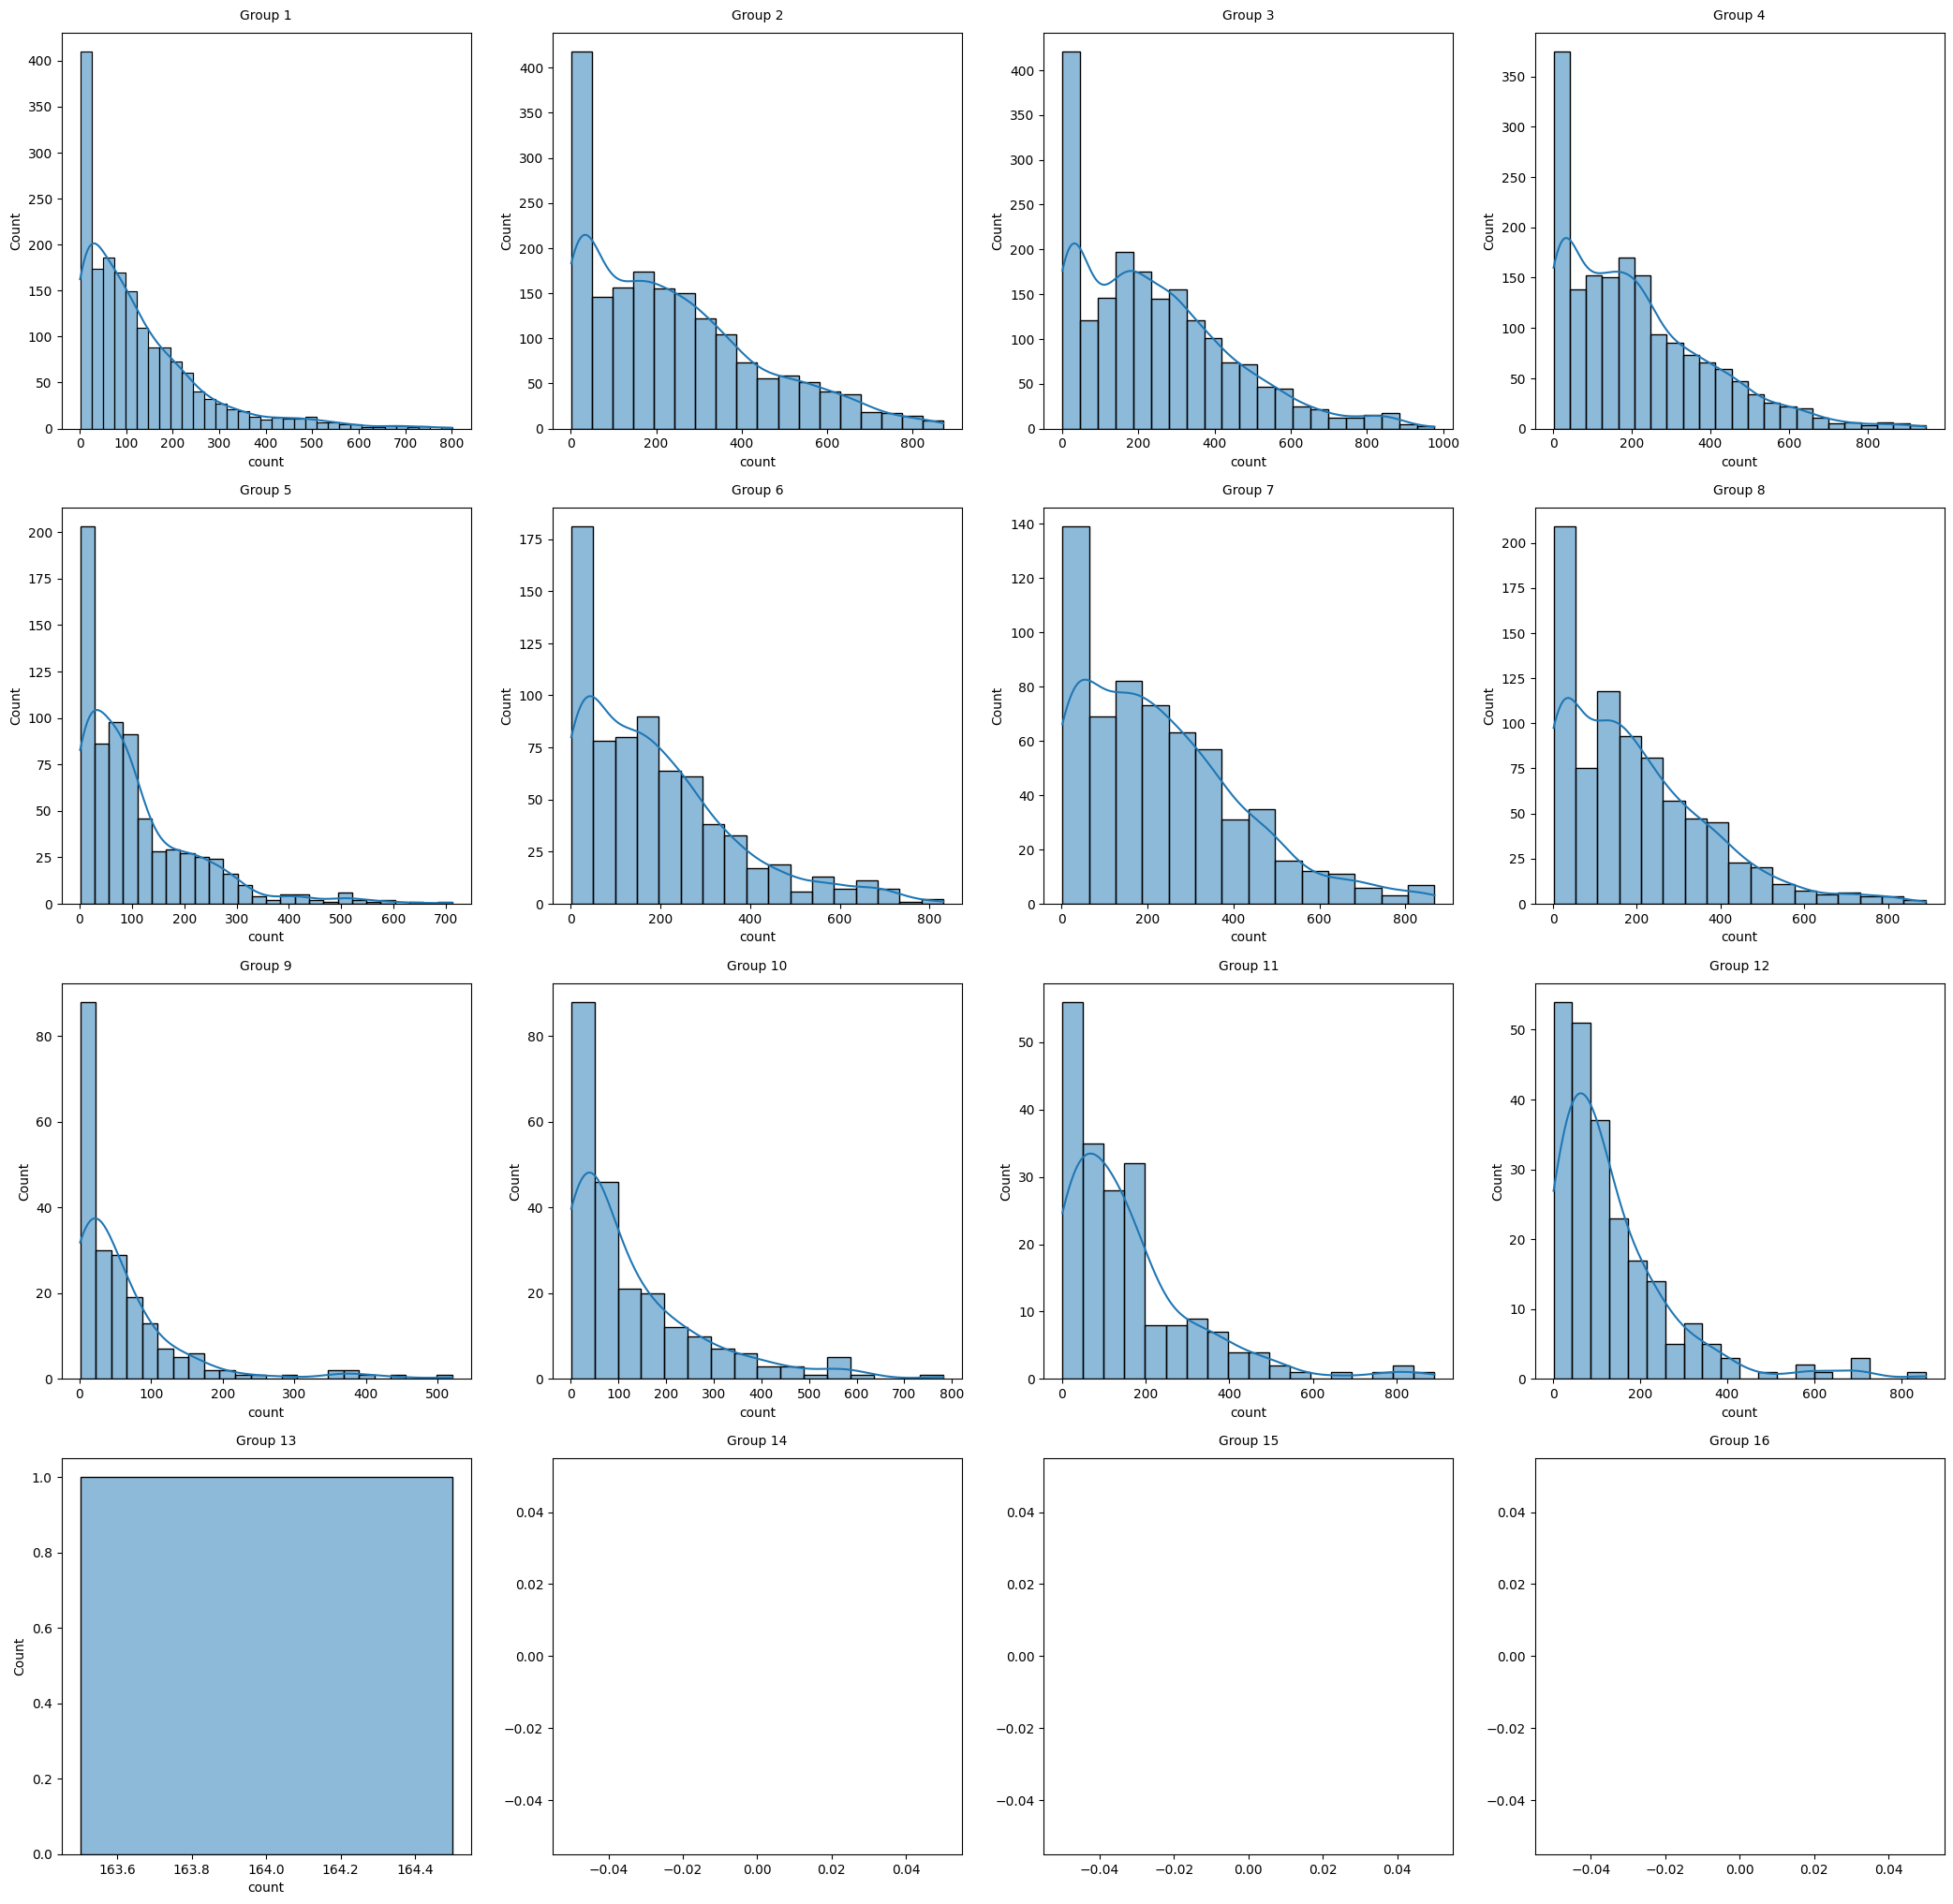

In [43]:
fig, axs = plt.subplots(ncols=4,  nrows= 4, figsize=(12,5))
plt.subplots_adjust(top=4, right=1.8)
index=0

for row in range(4):
  for col in range(4):
    sns.histplot(x=groups[index], data=df, kde=True , ax=axs[row,col])
    axs[row,col].set_title(f"Group {index+1}", pad=10, fontsize=10)
    index += 1

plt.show()

Oservation:
* None of the graph looks normally distribute.
* Probability that season is summer, winter or fall given that its Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is 0.
* Since their is no data points for group 14, 15, 16. So we can eliminate it fo levene's test.

##Equal variance: Levene's Test


* Null Hypothesis: Variances is similar in different weather and season.
* Alternate Hypothesis: Variances is not similar in different weather
and season.
* Significance level (alpha): 0.05

In [44]:
levene_stat, p_value = levene(grp1,grp2,grp3, grp4,grp5,grp6,grp7,grp8,grp9,grp10,grp11,grp12,grp13)
print(p_value)
if p_value < 0.05:
 print("Reject the Null hypothesis.Variances are not equal")
else:
 print("Fail to Reject the Null hypothesis.Variances are equal")

2.588417758373736e-146
Reject the Null hypothesis.Variances are not equal


1. As per above graphs, all groups are not following Gaussian distribution.
2. Data is Independent.
3. Variance is not equal.

**As per QQ plot and Levene's Test fails as part of Anova Testing, We need to perform kruskal Wallis Test**

In [46]:
#assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal_stat, p_value = kruskal(grp1,grp2,grp3,grp4,grp5,grp6,grp7,grp8,grp9,grp10,grp11,grp12,grp13)
print("p_value is ",p_value)
if p_value<0.05:
 print("Since p-value is less than the alpha value 0.05, we reject the null hypothesis. ie Number of cycles rented is different in different weather and season.")
else:
  print('Since p-value is greater than the alpha 0.05, We fail to reject the Null Hypothesis. ie Number of cycles rented is similar in different weather and season.')

p_value is  6.943215771245871e-187
Since p-value is less than the alpha value 0.05, we reject the null hypothesis. ie Number of cycles rented is different in different weather and season.


**Insights**
* In summer and fall seasons more bikes are rented as compared to other seasons.
* Whenever its a holiday more bikes are rented.
* It is also clear from the workingday also that whenever day is holiday or weekend,
slightly more bikes were rented.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were
rented.
* Whenever the humidity is less than 20, number of bikes rented is very very low.
* Whenever the temperature is less than 10, number of bikes rented is less.
* Whenever the windspeed is greater than 35, number of bikes rented is less.

**Recommendations**
* In summer and fall seasons the company should have more bikes in stock to be
rented. Because the demand in these seasons is higher as compared to other
seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes
being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temperature is less than 10 or in very cold days, company should have
less bikes.
* Whenever the windspeed is greater than 35 or in thunderstorms, company should
have less bikes in stock to be rented.